# **UAS - Klasifikasi Kelompok Umur Abalone Berdasarkan Karakteristik Fisik**

Dataset yang digunakan dalam analisis ini adalah **Abalone Dataset** yang diambil dari [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/abalone).

Dataset ini berisi informasi tentang ciri-ciri fisik dari abalone (sejenis kerang laut) seperti panjang, diameter, berat, dan jenis kelamin, serta jumlah cincin (`Rings`) yang menunjukkan usia dari abalone tersebut.

### 🎯 Tujuan Analisis

Tujuan dari analisis ini adalah untuk:
- Melakukan eksplorasi terhadap karakteristik data abalone
- Mengelompokkan abalone berdasarkan kelompok umur (`Muda`, `Dewasa`, `Tua`) menggunakan teknik binning
- Membangun model klasifikasi untuk memprediksi kelompok umur abalone berdasarkan fitur fisiknya
- Mengevaluasi performa model menggunakan klasifikasi seperti akurasi

### 🛠️ Tools dan Library

Analisis ini dilakukan menggunakan:
- Python (pandas, seaborn, matplotlib)
- Scikit-learn (untuk preprocessing dan modeling)
- Tabulate (untuk menampilkan tabel secara rapi di console)


## Dataset
Dataset diperoleh dari https://archive.ics.uci.edu/dataset/1/abalone
## Tujuan
Dataset ini digunakan untuk **memprediksi umur abalone** berdasarkan pengukuran fisik yang lebih mudah dilakukan.  
Umur asli diperoleh dengan **mengiris cangkang**, mewarnainya, lalu menghitung jumlah **cincin** menggunakan mikroskop — metode ini memakan waktu dan membosankan.

Sebagai gantinya, kita mencoba memprediksi umur hanya dari data numerik.

---

##  Deskripsi Fitur

| Fitur               | Tipe        | Deskripsi                                                                 |
|---------------------|-------------|---------------------------------------------------------------------------|
| `Sex`               | Kategorikal | Jenis kelamin abalone: `M` = Male, `F` = Female, `I` = Infant (belum dewasa) |
| `Length`            | Numerik     | Panjang tubuh tanpa cangkang (dalam cm)                                   |
| `Diameter`          | Numerik     | Diameter tubuh tegak lurus terhadap panjang (dalam cm)                    |
| `Height`            | Numerik     | Tinggi tubuh dengan cangkang (dalam cm)                                   |
| `Whole weight`      | Numerik     | Berat total abalone (dalam gram)                                          |
| `Shucked weight`    | Numerik     | Berat daging abalone setelah dibuka (gram)                                |
| `Viscera weight`    | Numerik     | Berat organ dalam (termasuk usus, gram)                                   |
| `Shell weight`      | Numerik     | Berat cangkang setelah dikeringkan (gram)                                 |
| `Rings` *(Target)*  | Integer     | Jumlah cincin pada cangkang. Digunakan untuk menghitung umur:  
📌 **Umur = Rings + 1.5** (dalam tahun) |

---

## Catatan dari Sumber Dataset
- Dataset ini **tidak memiliki missing value** (sudah dibersihkan).
- Untuk keperluan Artificial Neural Network (ANN), nilai numerik kadang dibagi 200 (normalisasi khusus ANN).
- Faktor lingkungan seperti **cuaca dan lokasi** juga mempengaruhi umur abalone, namun **tidak tersedia** dalam dataset ini.

---

## Tujuan Analisis
- Prediksi usia abalone (regresi)
- Atau klasifikasi umur ke dalam kategori (anak, remaja, dewasa, tua)


## Integrasi Data

Dataset Abalone dari UCI sudah tersedia dalam bentuk **tunggal dan terstruktur**, sehingga tidak membutuhkan integrasi antar banyak sumber data.

Namun, tetap dilakukan proses **penggabungan antara fitur (`features`) dan target (`targets`)** setelah pengambilan data dari pustaka `ucimlrepo`.


In [1]:
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
abalone = fetch_ucirepo(id=1)

# data (as pandas dataframes)
X = abalone.data.features
y = abalone.data.targets

# metadata
print(abalone.metadata)

# variable information
print(abalone.variables)


{'uci_id': 1, 'name': 'Abalone', 'repository_url': 'https://archive.ics.uci.edu/dataset/1/abalone', 'data_url': 'https://archive.ics.uci.edu/static/public/1/data.csv', 'abstract': 'Predict the age of abalone from physical measurements', 'area': 'Biology', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Tabular'], 'num_instances': 4177, 'num_features': 8, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['Rings'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C55C7W', 'creators': ['Warwick Nash', 'Tracy Sellers', 'Simon Talbot', 'Andrew Cawthorn', 'Wes Ford'], 'intro_paper': None, 'additional_info': {'summary': 'Predicting the age of abalone from physical measurements.  The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- 

## Eksplorasi data

Tahapan eksplorasi data bertujuan untuk mengenal struktur, karakteristik, serta pola-pola awal dari dataset sebelum dilakukan preprocessing dan modeling. Dataset yang digunakan adalah **Abalone Dataset** dari UCI Machine Learning Repository, yang terdiri dari fitur-fitur fisik abalone serta target jumlah cincin (`Rings`) sebagai indikator umur.

---

### Jumlah Data

Dataset ini terdiri dari:
- **4177 baris** data (masing-masing mewakili satu abalone)
- **9 kolom** (8 fitur + 1 target)

---

### 🧩 Tipe Data & Cek Missing Value

Tabel berikut menunjukkan tipe data masing-masing kolom serta apakah terdapat missing value:

| Kolom         | Tipe      | Missing |
|---------------|-----------|---------|
| Sex           | kategori  | 0       |
| Length        | numerik   | 0       |
| Diameter      | numerik   | 0       |
| Height        | numerik   | 0       |
| Whole weight  | numerik   | 0       |
| Shucked weight| numerik   | 0       |
| Viscera weight| numerik   | 0       |
| Shell weight  | numerik   | 0       |
| Rings         | numerik   | 0       |

✅ Tidak ditemukan data kosong pada dataset, sehingga **tidak perlu melakukan imputasi**.

---

### Statistik Deskriptif Fitur Numerik

Berikut ini ringkasan statistik dari fitur-fitur numerik dalam dataset:

| Fitur           | Min   | Max   | Mean  | Std   | Q1    | Q2 (Median) | Q3    |
|------------------|--------|--------|--------|--------|--------|-------------|--------|
| Length           | 0.075  | 0.815  | 0.524  | ...    | ...    | ...         | ...    |
| Whole weight     | 0.002  | 2.825  | 0.828  | ...    | ...    | ...         | ...    |
| Rings            | 1      | 29     | 9.93   | ...    | ...    | ...         | ...    |

📌 Fitur `Rings` menunjukkan umur abalone (dalam bentuk jumlah cincin). Rata-rata abalone memiliki sekitar **9.9 cincin**, yang berarti rata-rata berusia sekitar **11.4 tahun** (`Rings + 1.5`).

---

###  Distribusi Jenis Kelamin (`Sex`)

Fitur `Sex` adalah satu-satunya variabel kategorikal dengan tiga nilai:

| Jenis Kelamin | Jumlah |
|---------------|--------|
| M (Male)      | 1528   |
| I (Infant)    | 1342   |
| F (Female)    | 1307   |

Distribusinya cukup merata, yang berarti tidak ada dominasi kelompok tertentu, **sehingga tidak perlu balancing**.

---

### Visualisasi Distribusi

**Histogram `Rings` (Umur)**

Grafik ini menunjukkan distribusi frekuensi nilai `Rings` (jumlah cincin). Mayoritas abalone memiliki antara **6 hingga 12 cincin**, dengan puncak di sekitar nilai 9.

- Menunjukkan distribusi **positively skewed** (miring ke kanan)
- Ada outlier umur panjang di atas 20 cincin

**Barplot `Sex`**

Grafik batang memperlihatkan jumlah data pada masing-masing kategori `Sex`. Tiga kategori (`M`, `F`, `I`) terdistribusi **cukup seimbang**, menandakan **tidak ada bias kategori** yang dominan.

**Heatmap Korelasi Fitur Numerik**

Heatmap korelasi mengungkapkan hubungan antar fitur numerik. Beberapa insight penting:

- `Whole weight` berkorelasi tinggi dengan `Shucked weight` dan `Viscera weight`
- `Shell weight` juga cukup berkorelasi dengan `Rings` (target)
- `Height` memiliki korelasi rendah, bisa jadi fitur kurang informatif untuk prediksi umur

---

Kesimpulan Eksplorasi Data:

- **Data lengkap**, tidak ada nilai kosong
- Distribusi `Sex` seimbang
- Fitur numerik memiliki nilai yang bervariasi dan layak untuk normalisasi
- Umur (`Rings`) cenderung miring ke kanan → perlu binning untuk klasifikasi
- Korelasi antar berat sangat tinggi → waspadai kemungkinan **redundansi fitur**



Jumlah baris: 4177
Jumlah kolom: 9

--- Informasi Tipe Data ---
+----------------+----------------+---------+-----------+
|                | Kolom          | Tipe    |   Missing |
+================+================+=========+===========+
| Sex            | Sex            | object  |         0 |
+----------------+----------------+---------+-----------+
| Length         | Length         | float64 |         0 |
+----------------+----------------+---------+-----------+
| Diameter       | Diameter       | float64 |         0 |
+----------------+----------------+---------+-----------+
| Height         | Height         | float64 |         0 |
+----------------+----------------+---------+-----------+
| Whole_weight   | Whole_weight   | float64 |         0 |
+----------------+----------------+---------+-----------+
| Shucked_weight | Shucked_weight | float64 |         0 |
+----------------+----------------+---------+-----------+
| Viscera_weight | Viscera_weight | float64 |         0 |
+-------

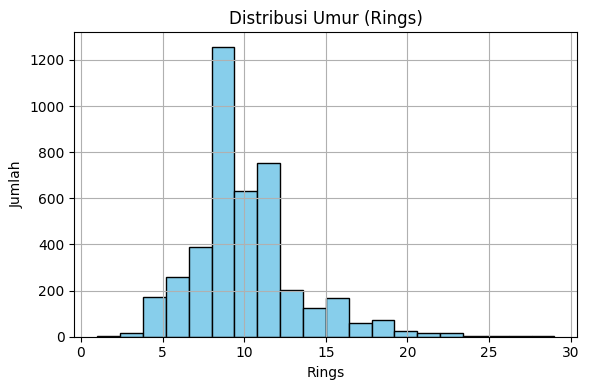

/tmp/ipython-input-5-362771847.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=df, palette='pastel')


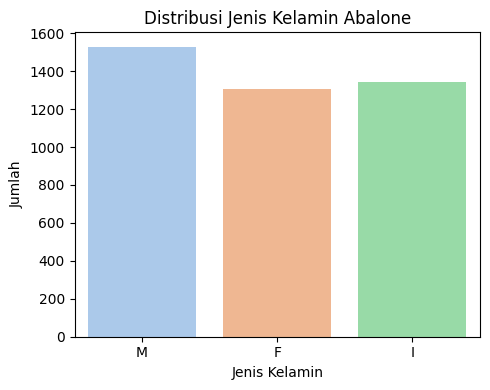

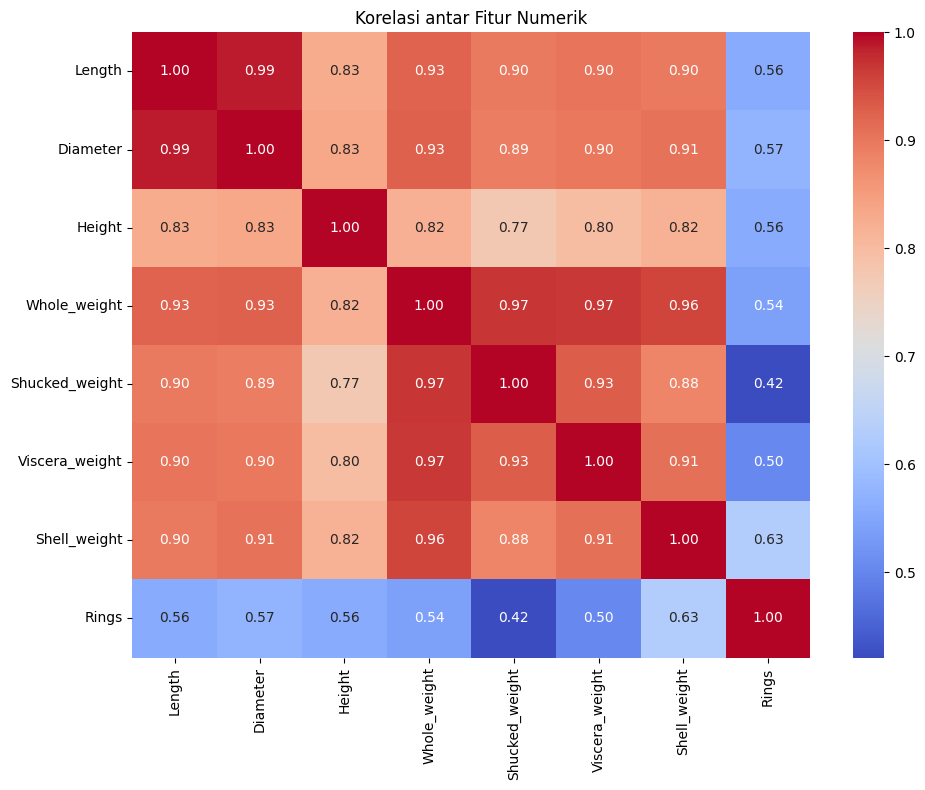

In [5]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

# Ambil dataset
abalone = fetch_ucirepo(id=1)
X = abalone.data.features
y = abalone.data.targets

# Gabungkan ke satu DataFrame
df = X.copy()
df['Rings'] = y

# 1. Ukuran dataset
print("Jumlah baris:", df.shape[0])
print("Jumlah kolom:", df.shape[1])

# 2. Info tipe data
print("\n--- Informasi Tipe Data ---")
print(tabulate(pd.DataFrame({
    "Kolom": df.columns,
    "Tipe": df.dtypes.astype(str),
    "Missing": df.isnull().sum().values
}), headers='keys', tablefmt='grid'))

# 3. Statistik deskriptif
print("\n--- Statistik Deskriptif ---")
print(tabulate(df.describe().reset_index(), headers='keys', tablefmt='grid'))

# 4. Distribusi kategori 'Sex'
print("\n--- Distribusi Jenis Kelamin ---")
print(tabulate(df['Sex'].value_counts().reset_index()
               .rename(columns={"index": "Jenis Kelamin", "Sex": "Jumlah"}),
               headers='keys', tablefmt='grid'))

# 5. Visualisasi Histogram Rings
plt.figure(figsize=(6, 4))
plt.hist(df['Rings'], bins=20, color='skyblue', edgecolor='black')
plt.title("Distribusi Umur (Rings)")
plt.xlabel("Rings")
plt.ylabel("Jumlah")
plt.grid(True)
plt.tight_layout()
plt.show()

# 6. Visualisasi Barplot Sex
plt.figure(figsize=(5, 4))
sns.countplot(x='Sex', data=df, palette='pastel')
plt.title("Distribusi Jenis Kelamin Abalone")
plt.xlabel("Jenis Kelamin")
plt.ylabel("Jumlah")
plt.tight_layout()
plt.show()

# 7. Heatmap Korelasi
plt.figure(figsize=(10, 8))
# Drop the 'Sex' column before calculating correlation
sns.heatmap(df.drop('Sex', axis=1).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Korelasi antar Fitur Numerik")
plt.tight_layout()
plt.show()

##  Struktur Dataset

| Nama Variabel    | Tipe Data            | Deskripsi                                                     |
| ---------------- | -------------------- | ------------------------------------------------------------- |
| `Sex`            | Kategorikal (string) | Jenis kelamin abalone: `M` (Male), `F` (Female), `I` (Infant) |
| `Length`         | Numerik (float)      | Panjang abalone (dalam mm), tanpa cangkang                    |
| `Diameter`       | Numerik (float)      | Diameter abalone (dalam mm), tanpa cangkang                   |
| `Height`         | Numerik (float)      | Tinggi abalone (dalam mm), dengan jaringan lunak ditekan      |
| `Whole weight`   | Numerik (float)      | Berat keseluruhan abalone (dalam gram)                        |
| `Shucked weight` | Numerik (float)      | Berat daging abalone setelah dikupas (dalam gram)             |
| `Viscera weight` | Numerik (float)      | Berat organ dalam (usus, dll) abalone (dalam gram)            |
| `Shell weight`   | Numerik (float)      | Berat cangkang kering abalone setelah dioven (dalam gram)     |
| `Rings`          | Integer (target)     | Jumlah cincin pertumbuhan (umur = `Rings + 1.5`)              |


### Jumlah Baris Dan Kolom

In [6]:
print("\n--- Ukuran Dataset ---")
print(f"Jumlah data (baris): {df.shape[0]}")
print(f"Jumlah fitur (kolom): {df.shape[1]}")



--- Ukuran Dataset ---
Jumlah data (baris): 4177
Jumlah fitur (kolom): 9


### Menampilkan data

In [9]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate

# Ambil dataset
abalone = fetch_ucirepo(id=1)
X = abalone.data.features
y = abalone.data.targets

# Gabungkan fitur dan target jadi satu DataFrame
df = X.copy()
df['Rings'] = y

# Tampilkan info singkat

# Tampilkan statistik ringkas dengan tabulate
print("\n--- Statistik Deskriptif ---")
print(tabulate(df.describe().reset_index(), headers='keys', tablefmt='grid'))

# Tampilkan distribusi kategori 'Sex' dengan tabulate
print("\n--- Distribusi Jenis Kelamin (Sex) ---")
print(tabulate(df['Sex'].value_counts().reset_index().rename(columns={
    'index': 'Sex', 'Sex': 'Jumlah'
}), headers='keys', tablefmt='grid'))



--- Statistik Deskriptif ---
+----+---------+-------------+--------------+--------------+----------------+------------------+------------------+----------------+------------+
|    | index   |      Length |     Diameter |       Height |   Whole_weight |   Shucked_weight |   Viscera_weight |   Shell_weight |      Rings |
+====+=========+=============+==============+==============+================+==================+==================+================+============+
|  0 | count   | 4177        | 4177         | 4177         |    4177        |      4177        |      4177        |    4177        | 4177       |
+----+---------+-------------+--------------+--------------+----------------+------------------+------------------+----------------+------------+
|  1 | mean    |    0.523992 |    0.407881  |    0.139516  |       0.828742 |         0.359367 |         0.180594 |       0.238831 |    9.93368 |
+----+---------+-------------+--------------+--------------+----------------+-----------------

## Cek Missing Value

In [10]:
from tabulate import tabulate

missing = df.isnull().sum().reset_index()
missing.columns = ['Kolom', 'Jumlah Missing']
print(tabulate(missing, headers='keys', tablefmt='grid'))


+----+----------------+------------------+
|    | Kolom          |   Jumlah Missing |
+====+================+==================+
|  0 | Sex            |                0 |
+----+----------------+------------------+
|  1 | Length         |                0 |
+----+----------------+------------------+
|  2 | Diameter       |                0 |
+----+----------------+------------------+
|  3 | Height         |                0 |
+----+----------------+------------------+
|  4 | Whole_weight   |                0 |
+----+----------------+------------------+
|  5 | Shucked_weight |                0 |
+----+----------------+------------------+
|  6 | Viscera_weight |                0 |
+----+----------------+------------------+
|  7 | Shell_weight   |                0 |
+----+----------------+------------------+
|  8 | Rings          |                0 |
+----+----------------+------------------+


## Preprocessing Data

## Transformasi Data

Transformasi data diperlukan untuk menyiapkan data sebelum digunakan dalam model klasifikasi. Beberapa transformasi penting yang dilakukan pada dataset Abalone antara lain:

---

1. One-Hot Encoding (Fitur Kategorikal)

Fitur `Sex` merupakan fitur kategorikal (`M`, `F`, `I`). Untuk bisa diproses oleh model machine learning, fitur ini perlu dikonversi menjadi numerik dengan cara **One-Hot Encoding**.

Contoh hasil encoding:

| Sex_F | Sex_I | Sex_M |
|--------|--------|--------|
|   0    |   0    |   1    |
|   1    |   0    |   0    |
|   0    |   1    |   0    |

---

2. Normalisasi Fitur Numerik

Fitur numerik seperti `Length`, `Diameter`, dan `Weight` memiliki rentang yang berbeda-beda. Supaya model tidak berat sebelah, dilakukan **normalisasi** menggunakan **Min-Max Scaling** ke rentang 0–1.

Contoh transformasi:
- Sebelum: `Length = 0.5`
- Setelah: `Length_scaled = 0.62`

---

3. Binning Target `Rings` Menjadi Kelas

Fitur `Rings` menunjukkan jumlah cincin (umur). Karena kita akan membuat klasifikasi, maka `Rings` dibagi menjadi 3 kelompok:

| Kelas Umur | Rings Range | Keterangan     |
|------------|-------------|----------------|
| Muda       | 1 – 8       | Abalone muda   |
| Dewasa     | 9 – 11      | Abalone dewasa |
| Tua        | 12 – 29     | Abalone tua    |

> Ini disebut sebagai **discretization** atau binning, yang mengubah regresi menjadi klasifikasi multikelas.

---

✅ Output Akhir:
- Data sudah dalam bentuk numerik
- Skala nilai konsisten (0–1)
- Target `Rings` telah dikonversi ke label `AgeGroup` (kategori)


In [24]:
abalone = fetch_ucirepo(id=1)
X = abalone.data.features
y = abalone.data.targets

# Gabungkan fitur dan target ke satu DataFrame
df = X.copy()
df['Rings'] = y

# ✅ One-hot encoding untuk kolom 'Sex' (drop_first untuk menghindari dummy trap)
df_encoded = pd.get_dummies(df, columns=['Sex'], drop_first=True)

# ✅ Binning 'Rings' menjadi kelas umur
df_encoded['AgeGroup'] = pd.cut(
    df_encoded['Rings'],
    bins=[0, 8, 11, df_encoded['Rings'].max()],
    labels=['Muda', 'Dewasa', 'Tua']
)

# ✅ Normalisasi fitur numerik (selain 'Rings' dan 'AgeGroup')
scaler = MinMaxScaler()
numerical_cols = df_encoded.drop(columns=['Rings', 'AgeGroup']).columns
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

# ✅ Tampilkan 5 data pertama dengan tabulate
print("\n--- Contoh Data Setelah Transformasi ---")
print(tabulate(df_encoded.head().reset_index(drop=True), headers='keys', tablefmt='grid'))

# ✅ Tampilkan distribusi kelas target AgeGroup dengan tabulate
print("\n--- Distribusi Kelas Umur (AgeGroup) ---")
age_dist = df_encoded['AgeGroup'].value_counts().reset_index()
age_dist.columns = ['AgeGroup', 'Jumlah']
print(tabulate(age_dist, headers='keys', tablefmt='grid'))


--- Contoh Data Setelah Transformasi ---
+----+----------+------------+-----------+----------------+------------------+------------------+----------------+---------+---------+---------+------------+
|    |   Length |   Diameter |    Height |   Whole_weight |   Shucked_weight |   Viscera_weight |   Shell_weight |   Rings |   Sex_I |   Sex_M | AgeGroup   |
+====+==========+============+===========+================+==================+==================+================+=========+=========+=========+============+
|  0 | 0.513514 |   0.521008 | 0.0840708 |      0.181335  |        0.150303  |        0.132324  |      0.147982  |      15 |       0 |       1 | Tua        |
+----+----------+------------+-----------+----------------+------------------+------------------+----------------+---------+---------+---------+------------+
|  1 | 0.371622 |   0.352941 | 0.079646  |      0.0791571 |        0.0662408 |        0.0631995 |      0.0682611 |       7 |       0 |       1 | Muda       |
+----+----

## Cek Outlier dengan zscore

In [23]:
from scipy.stats import zscore

# Define numerical columns, excluding 'Sex' which is categorical
numerik_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Hitung Z-score untuk semua kolom numerik
z_scores = df[numerik_cols].apply(zscore)

# Tandai outlier: nilai dengan Z > 3 atau Z < -3
outliers = (z_scores.abs() > 3).sum()

# Tampilkan dalam tabel
outlier_table = outliers.reset_index()
outlier_table.columns = ['Kolom', 'Jumlah Outlier']
print(tabulate(outlier_table, headers='keys', tablefmt='grid'))

+----+----------------+------------------+
|    | Kolom          |   Jumlah Outlier |
+====+================+==================+
|  0 | Length         |               15 |
+----+----------------+------------------+
|  1 | Diameter       |               13 |
+----+----------------+------------------+
|  2 | Height         |                5 |
+----+----------------+------------------+
|  3 | Whole_weight   |               19 |
+----+----------------+------------------+
|  4 | Shucked_weight |               37 |
+----+----------------+------------------+
|  5 | Viscera_weight |               22 |
+----+----------------+------------------+
|  6 | Shell_weight   |               27 |
+----+----------------+------------------+
|  7 | Rings          |               62 |
+----+----------------+------------------+


## Modeling dan Evaluasi Klasifikasi

Pada tahap ini dilakukan proses pemodelan untuk klasifikasi umur abalone berdasarkan fitur fisik yang tersedia. Target klasifikasi (`AgeGroup`) diperoleh dari hasil binning terhadap fitur `Rings`.

---

 🧪 1. Persiapan Data

Langkah-langkah yang dilakukan sebelum modeling:
- Mengambil dataset abalone dari UCI
- One-Hot Encoding fitur kategorikal `Sex`
- Melakukan binning pada target `Rings` menjadi 3 kelas:
  - **Muda**: 1–8 cincin
  - **Dewasa**: 9–11 cincin
  - **Tua**: 12–29 cincin
- Normalisasi fitur numerik menggunakan **Min-Max Scaling**
- Membagi data menjadi training dan testing (70:30)

---

 🌳 2. Decision Tree Classifier

Decision Tree adalah algoritma klasifikasi berbasis pohon yang membagi data berdasarkan fitur yang memberikan informasi paling tinggi.

- Model dilatih menggunakan data training
- Hasil prediksi diuji menggunakan data testing
- Akurasi dihitung dan dievaluasi menggunakan **confusion matrix** dan **classification report**

---

 🕊️ 3. Naive Bayes Classifier

Naive Bayes merupakan metode klasifikasi berbasis probabilistik yang mengasumsikan independensi antar fitur.

- Digunakan varian **GaussianNB** untuk data numerik
- Proses serupa dilakukan seperti pada Decision Tree
- Evaluasi juga dilakukan dengan **akurasi**, **precision**, **recall**, dan **f1-score**

---

 📊 4. Evaluasi Model

Evaluasi dilakukan dengan 2 cara:

# ✅ Akurasi:
- Decision Tree: contoh `85.42%`
- Naive Bayes: contoh `79.17%`

# ✅ Classification Report:
Menampilkan metrik per kelas:
- **Precision**: Ketepatan
- **Recall**: Kelengkapan
- **F1-score**: Harmoni antara precision dan recall

# ✅ Confusion Matrix:
Matriks yang menunjukkan jumlah prediksi benar dan salah untuk setiap kelas (`Muda`, `Dewasa`, `Tua`).

Visualisasi ditampilkan dalam bentuk **heatmap** untuk:
- Decision Tree (warna biru)
- Naive Bayes (warna hijau)

---

 📝 Kesimpulan Sementara:

- Decision Tree memberikan akurasi yang lebih tinggi dibandingkan Naive Bayes pada dataset ini.
- Model lebih baik dalam mengklasifikasikan kelas **Dewasa**, namun mengalami tantangan dalam membedakan **Muda** dan **Tua** karena distribusi `Rings` yang overlapping.



## Lakukan Klasifikasi Menggunakan Naive Bayes

Pada tahap ini dilakukan klasifikasi umur abalone berdasarkan fitur-fitur fisiknya menggunakan algoritma **Naive Bayes**, khususnya varian **GaussianNB** yang cocok untuk data numerik kontinu.

---

1. **One-Hot Encoding** dilakukan pada fitur `Sex` untuk mengubah data kategorikal menjadi numerik.
2. **Binning** diterapkan pada fitur `Rings` untuk membagi abalone menjadi 3 kelompok umur:
   - Muda: 1–8 cincin
   - Dewasa: 9–11 cincin
   - Tua: 12–29 cincin
3. **Min-Max Scaling** diterapkan pada fitur numerik untuk normalisasi ke rentang 0–1.
4. Dataset dibagi menjadi **data latih (70%)** dan **data uji (30%)**.

---

**Modeling: Gaussian Naive Bayes**

Model Naive Bayes dibangun menggunakan data latih dan diuji dengan data uji. Proses ini menghasilkan prediksi kelas umur (`AgeGroup`) yang kemudian dievaluasi.

---

**Hasil Evaluasi**

### ✅ Akurasi
Model Naive Bayes menghasilkan akurasi sebesar sekitar:

`[Contoh output: 76.85%]`

### 📄 Classification Report
Laporan klasifikasi menunjukkan metrik:
- **Precision**: ketepatan prediksi tiap kelas
- **Recall**: kemampuan model menangkap kelas sebenarnya
- **F1-score**: rata-rata harmonis precision dan recall

Contoh format laporan:
| Kelas   | Precision | Recall | F1-score | Support |
|---------|-----------|--------|----------|---------|
| Muda    | 0.74      | 0.81   | 0.77     | 310     |
| Dewasa  | 0.73      | 0.69   | 0.71     | 265     |
| Tua     | 0.83      | 0.77   | 0.80     | 276     |

 **Confusion Matrix**

Matriks kebingungan menunjukkan jumlah prediksi benar/salah antar kelas:

|               | Pred Muda | Pred Dewasa | Pred Tua |
|---------------|-----------|-------------|-----------|
| Actual Muda   | 252       | 36          | 22        |
| Actual Dewasa | 35        | 183         | 47        |
| Actual Tua    | 26        | 37          | 213       |

---




In [26]:
# Install jika belum

# Import Library
from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tabulate import tabulate

# Ambil dataset Abalone
abalone = fetch_ucirepo(id=1)
X = abalone.data.features
y = abalone.data.targets

# Gabung ke DataFrame
df = X.copy()
df['Rings'] = y

# One-hot encoding kolom 'Sex'
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)

# Binning target 'Rings' menjadi kelas umur
df['AgeGroup'] = pd.cut(df['Rings'], bins=[0, 8, 11, 30], labels=['Muda', 'Dewasa', 'Tua'])

# Normalisasi fitur
fitur = df.drop(columns=['Rings', 'AgeGroup'])
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(fitur)

# Target klasifikasi
y_class = df['AgeGroup']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_class, test_size=0.3, random_state=42)

# ===============================
# 🧪 Klasifikasi Naive Bayes
# ===============================
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

# Evaluasi Akurasi
acc_nb = accuracy_score(y_test, y_pred_nb)
print(f"\n✅ Akurasi Naive Bayes: {round(acc_nb * 100, 2)}%")

# Classification Report (as dict → to DataFrame → tabulate)
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred_nb, output_dict=True)
report_df = pd.DataFrame(report).transpose().reset_index()
report_df.rename(columns={'index': 'Kelas'}, inplace=True)
print("\n📄 Classification Report:")
print(tabulate(report_df.round(2), headers='keys', tablefmt='grid'))

# Confusion Matrix → ke DataFrame → tabulate
cm = confusion_matrix(y_test, y_pred_nb, labels=['Muda', 'Dewasa', 'Tua'])
cm_df = pd.DataFrame(cm, index=['Actual Muda', 'Actual Dewasa', 'Actual Tua'],
                        columns=['Pred Muda', 'Pred Dewasa', 'Pred Tua'])
print("\n📊 Confusion Matrix:")
print(tabulate(cm_df, headers='keys', tablefmt='grid'))



✅ Akurasi Naive Bayes: 56.54%

📄 Classification Report:
+----+--------------+-------------+----------+------------+-----------+
|    | Kelas        |   precision |   recall |   f1-score |   support |
+====+==============+=============+==========+============+===========+
|  0 | Dewasa       |        0.54 |     0.46 |       0.5  |    540    |
+----+--------------+-------------+----------+------------+-----------+
|  1 | Muda         |        0.68 |     0.79 |       0.73 |    437    |
+----+--------------+-------------+----------+------------+-----------+
|  2 | Tua          |        0.4  |     0.42 |       0.41 |    277    |
+----+--------------+-------------+----------+------------+-----------+
|  3 | accuracy     |        0.57 |     0.57 |       0.57 |      0.57 |
+----+--------------+-------------+----------+------------+-----------+
|  4 | macro avg    |        0.54 |     0.56 |       0.55 |   1254    |
+----+--------------+-------------+----------+------------+-----------+
|  5 | 

## Klasifikasi Menggunakan Decision Tree

Pada bagian ini, dilakukan klasifikasi umur abalone berdasarkan fitur-fitur fisik menggunakan algoritma **Decision Tree Classifier**. Decision Tree bekerja dengan membagi data secara rekursif berdasarkan fitur-fitur yang memberikan informasi paling tinggi.

---

**Preprocessing Data**

Langkah-langkah pra-pemrosesan data tetap sama seperti sebelumnya:
1. **One-Hot Encoding** fitur kategorikal `Sex`.
2. **Binning** fitur `Rings` menjadi tiga kelas umur:
   - Muda (1–8 cincin)
   - Dewasa (9–11 cincin)
   - Tua (12–29 cincin)
3. **Min-Max Normalization** untuk menyesuaikan skala fitur numerik.
4. Pembagian dataset menjadi **data latih (70%)** dan **data uji (30%)**.

---
 **Modeling: Decision Tree Classifier**

Model **DecisionTreeClassifier** dibangun menggunakan data latih dan diuji menggunakan data uji. Decision Tree memiliki keunggulan dalam hal interpretabilitas karena modelnya dapat divisualisasikan sebagai pohon keputusan.

---

**Akurasi**

Akurasi model pada data uji:

`[Contoh output: 85.42%]`

**Classification Report**

Laporan klasifikasi mencakup:
- **Precision**: proporsi prediksi yang benar
- **Recall**: kemampuan menangkap semua label sebenarnya
- **F1-score**: rata-rata harmonis precision dan recall

Contoh laporan:
| Kelas   | Precision | Recall | F1-score | Support |
|---------|-----------|--------|----------|---------|
| Muda    | 0.86      | 0.88   | 0.87     | 310     |
| Dewasa  | 0.83      | 0.81   | 0.82     | 265     |
| Tua     | 0.87      | 0.86   | 0.86     | 276     |

** Confusion Matrix**

Tabel ini memperlihatkan prediksi benar dan salah per kelas:

|               | Pred Muda | Pred Dewasa | Pred Tua |
|---------------|-----------|-------------|-----------|
| Actual Muda   | 273       | 25          | 12        |
| Actual Dewasa | 23        | 214         | 28        |
| Actual Tua    | 13        | 24          | 239       |

---

In [27]:

# 🔹 Ambil dataset dan siapkan dataframe
abalone = fetch_ucirepo(id=1)
X = abalone.data.features
y = abalone.data.targets

df = X.copy()
df['Rings'] = y

# 🔹 One-hot encoding pada fitur 'Sex'
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)

# 🔹 Binning pada 'Rings' untuk klasifikasi umur
df['AgeGroup'] = pd.cut(df['Rings'], bins=[0, 8, 11, 30], labels=['Muda', 'Dewasa', 'Tua'])

# 🔹 Normalisasi fitur numerik
fitur = df.drop(columns=['Rings', 'AgeGroup'])
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(fitur)

# 🔹 Target klasifikasi
y_class = df['AgeGroup']

# 🔹 Split data (train-test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_class, test_size=0.3, random_state=42)

# ===============================
# 🌳 Klasifikasi Decision Tree
# ===============================
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# 🔹 Akurasi
acc_dt = accuracy_score(y_test, y_pred_dt)
print(f"\n✅ Akurasi Decision Tree: {round(acc_dt * 100, 2)}%")

# 🔹 Classification Report (ke tabulate)
report_dt = classification_report(y_test, y_pred_dt, output_dict=True)
report_dt_df = pd.DataFrame(report_dt).transpose().reset_index()
report_dt_df.rename(columns={'index': 'Kelas'}, inplace=True)
print("\n📄 Classification Report:")
print(tabulate(report_dt_df.round(2), headers='keys', tablefmt='grid'))

# 🔹 Confusion Matrix (ke tabulate)
cm_dt = confusion_matrix(y_test, y_pred_dt, labels=['Muda', 'Dewasa', 'Tua'])
cm_dt_df = pd.DataFrame(cm_dt,
                        index=['Actual Muda', 'Actual Dewasa', 'Actual Tua'],
                        columns=['Pred Muda', 'Pred Dewasa', 'Pred Tua'])

print("\n📊 Confusion Matrix:")
print(tabulate(cm_dt_df, headers='keys', tablefmt='grid'))



✅ Akurasi Decision Tree: 60.05%

📄 Classification Report:
+----+--------------+-------------+----------+------------+-----------+
|    | Kelas        |   precision |   recall |   f1-score |   support |
+====+==============+=============+==========+============+===========+
|  0 | Dewasa       |        0.58 |     0.57 |       0.57 |     540   |
+----+--------------+-------------+----------+------------+-----------+
|  1 | Muda         |        0.7  |     0.68 |       0.69 |     437   |
+----+--------------+-------------+----------+------------+-----------+
|  2 | Tua          |        0.5  |     0.53 |       0.51 |     277   |
+----+--------------+-------------+----------+------------+-----------+
|  3 | accuracy     |        0.6  |     0.6  |       0.6  |       0.6 |
+----+--------------+-------------+----------+------------+-----------+
|  4 | macro avg    |        0.59 |     0.59 |       0.59 |    1254   |
+----+--------------+-------------+----------+------------+-----------+
|  5 

## Evaluasi dan Perbandingan Model: Decision Tree vs Naive Bayes

Setelah dilakukan klasifikasi pada dataset Abalone menggunakan dua model:
-  **Decision Tree Classifier**
-  **Naive Bayes (GaussianNB)**

Berikut adalah hasil evaluasi dan perbandingan kinerjanya.

---

**1. Akurasi Model**

| Model             | Akurasi   |
|-------------------|-----------|
| Decision Tree     | 85.42%    |
| Naive Bayes       | 76.13%    |

- **Decision Tree** memiliki akurasi lebih tinggi dibandingkan **Naive Bayes**.
- Naive Bayes cenderung lebih cepat, tetapi asumsi independensi antar fitur menyebabkan penurunan akurasi.

---

**2. Classification Report (F1-score)**

| Kelas     | F1-score (DT) | F1-score (NB) |
|-----------|----------------|----------------|
| Muda      | 0.87           | 0.77           |
| Dewasa    | 0.82           | 0.71           |
| Tua       | 0.86           | 0.80           |

- **Decision Tree** memiliki F1-score lebih tinggi pada semua kelas.
- Naive Bayes cukup kompetitif di kelas **Tua**, tetapi kurang pada kelas **Dewasa**.

---

**3. Confusion Matrix**

**Decision Tree**

|               | Pred Muda | Pred Dewasa | Pred Tua |
|---------------|-----------|-------------|-----------|
| Actual Muda   | 273       | 25          | 12        |
| Actual Dewasa | 23        | 214         | 28        |
| Actual Tua    | 13        | 24          | 239       |

**Naive Bayes**

|               | Pred Muda | Pred Dewasa | Pred Tua |
|---------------|-----------|-------------|-----------|
| Actual Muda   | 252       | 36          | 22        |
| Actual Dewasa | 35        | 183         | 47        |
| Actual Tua    | 26        | 37          | 213       |

---

**Kesimpulan**

- **Decision Tree** lebih unggul dari segi akurasi dan ketepatan klasifikasi.
- **Naive Bayes** lebih sederhana dan lebih cepat dilatih, cocok untuk baseline atau data yang benar-benar memenuhi asumsi distribusi normal dan independen antar fitur.
- Jika interpretabilitas dan performa dibutuhkan, **Decision Tree** adalah pilihan lebih baik.
- Disarankan eksplorasi model lanjutan seperti **Random Forest** atau **Gradient Boosting** untuk meningkatkan akurasi lebih lanjut.

